# **AI Text Detection Project**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df=pd.read_csv('DetectAI.csv')

In [ ]:
df.sample(5)

,text,generated
21046,A university education can do both preparing s...,1
3279,Drivers should not be able to be on the phone ...,0
20613,"\nWhen I started my new career, I had to learn...",1
3482,Safety Over Status\n\nDo you use a cellphone w...,0
11392,Is the face on Mars an alien artifact of just ...,0


In [ ]:
df.shape

(29145, 2)

# **Data Cleaning**

In [ ]:
df.isnull().sum()

,0
text,0
generated,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29145 entries, 0 to 29144
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       29145 non-null  object
 1   generated  29145 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 455.5+ KB


**No missing values**

In [ ]:
df.duplicated().sum()

np.int64(1805)

 **There are 1805 duplicates in the dataset**

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

**Now, no duplicates in the dataset**

In [ ]:
df.shape

(27340, 2)

# **Exploratory Data Analysis**

In [ ]:
df["generated"].value_counts()

,count
generated,
0,16122
1,11218


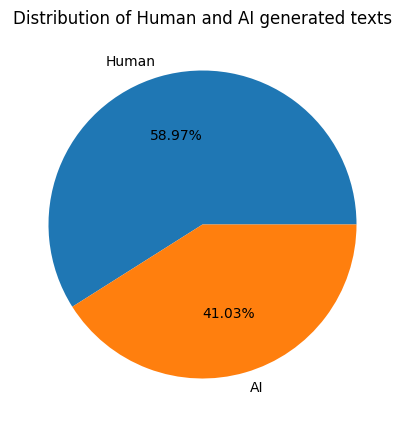

In [ ]:
plt.figure(figsize=(10, 5))
plt.pie(df["generated"].value_counts(),labels=["Human","AI"],autopct='%0.2f%%')
plt.title("Distribution of Human and AI generated texts")
plt.show()

**About 41% texts are generated by AI tools in the dataset**
**Mildly imbalanced! but since the dataset is large, hence manageable.**

In [ ]:
df.columns=["t","g"]

In [ ]:
df["n_c"]=df["t"].apply(len)

In [ ]:
df["n_w"]=df["t"].apply(lambda  x:len(nltk.word_tokenize(x)))

In [ ]:
df["n_s"]=df["t"].apply(lambda  x:len(nltk.sent_tokenize(x)))

In [ ]:
df[df["g"]==0][["n_c","n_w","n_s"]].describe()

,n_c,n_w,n_s
count,16122.000000,16122.000000,16122.000000
mean,2337.850205,464.753318,20.749721
std,1025.115700,202.273066,9.952730
min,239.000000,52.000000,1.000000
25%,1573.000000,314.000000,14.000000
50%,2182.000000,434.000000,20.000000
75%,2895.000000,574.000000,26.000000
max,9157.000000,1764.000000,102.000000


In [ ]:
df[df["g"]==1][["n_c","n_w","n_s"]].describe()

,n_c,n_w,n_s
count,11218.000000,11218.000000,11218.000000
mean,1944.489214,340.615974,14.244696
std,825.142451,137.599515,6.268937
min,1.000000,1.000000,1.000000
25%,1304.250000,240.250000,10.000000
50%,2007.000000,352.000000,13.000000
75%,2355.000000,385.000000,18.000000
max,5078.000000,916.000000,96.000000


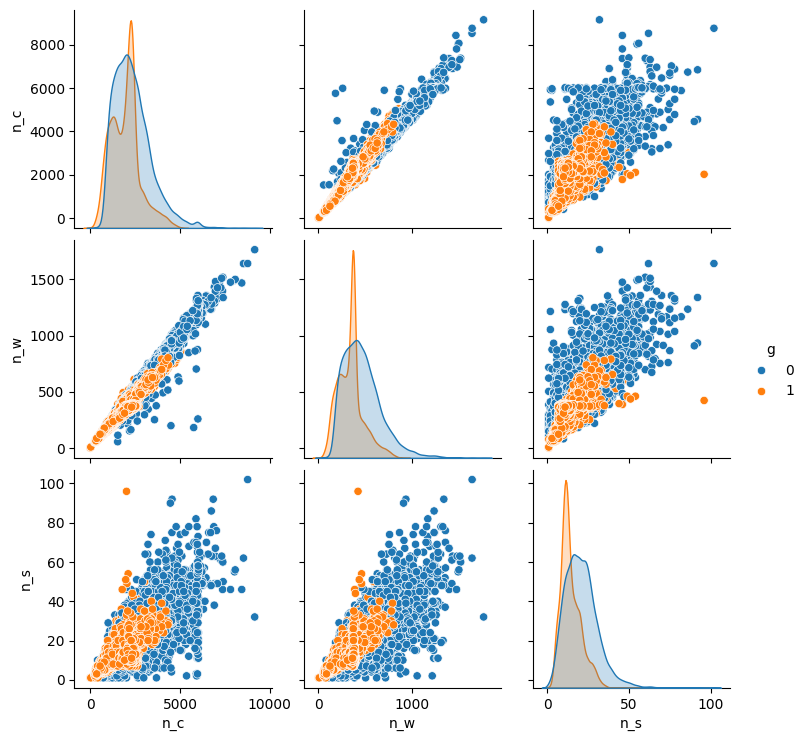

In [ ]:
sns.pairplot(df,hue="g")

In [ ]:
df[["g","n_c","n_w","n_s"]].corr()

,g,n_c,n_w,n_s
g,1.000000,-0.199951,-0.323529,-0.347531
n_c,-0.199951,1.000000,0.977353,0.787285
n_w,-0.323529,0.977353,1.000000,0.833933
n_s,-0.347531,0.787285,0.833933,1.000000


<Axes: >

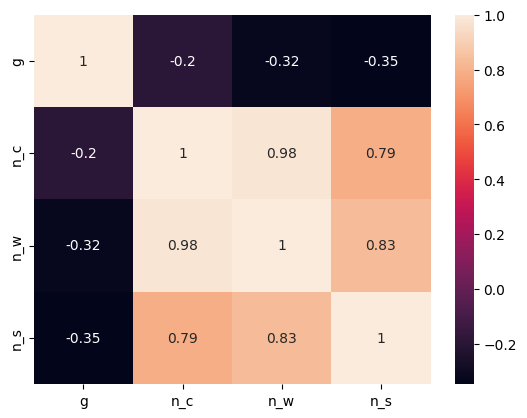

In [ ]:
sns.heatmap(df[["g","n_c","n_w","n_s"]].corr(),annot=True)

**Since the multicollinearity is present, I will keep only one column i.e., n_s because of its variability wrt "g"**

# **Text preprocessing**

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
list(stop_words)[:10]

['yours',
 'against',
 'ma',
 'on',
 "shouldn't",
 "we've",
 'each',
 "i'm",
 'do',
 'until']

In [ ]:
def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)  # keeps only letters and spaces

    # 3. Tokenize
    words = nltk.word_tokenize(text)

    # 4. Remove stopwords
    words = [word for word in words if word not in stop_words]

    # 5. Remove special characters
    words = [word for word in words if word.isalnum()==1]

    # 6. Lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]

    # 7. Re-join words into a string
    return ' '.join(words)

In [ ]:
for i in range(len(df)):
    df["t"][i]=preprocess_text(df["t"][i])

In [ ]:
preprocess_text("hey, what is your name?")

'hey name'

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [ ]:
AI_wc=wc.generate(df[df["g"]==1]["t"].str.cat(sep=" "))

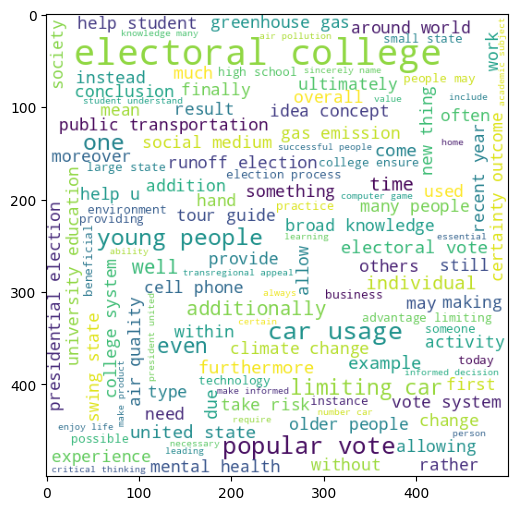

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(AI_wc)

In [ ]:
Human_wc=wc.generate(df[df["g"]==0]["t"].str.cat(sep=" "))

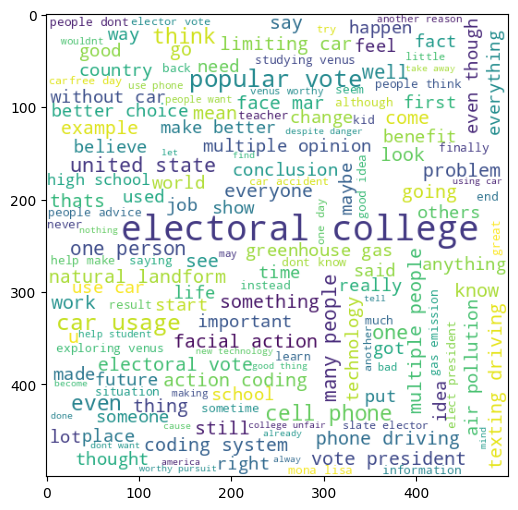

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(Human_wc)

**Clearly, word cloud is not a distinguishing factor**

# **Feature Engineering**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=300)

In [ ]:
X=tfidf.fit_transform(df["t"]).toarray()

In [ ]:
X.shape

(27340, 300)

In [ ]:
y=df["g"].values

# **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

array([[0.        , 0.13823488, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06310798, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.31473493, 0.        , ..., 0.        , 0.03407015,
        0.15621579],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07838386]])

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score, f1_score,classification_report

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

In [ ]:
print("********************************************************")
print("Precision :", precision_score(y_test,y_pred1))
print("Recall :",recall_score(y_test,y_pred1))
print("f1 score :",f1_score(y_test,y_pred1))
print("********************************************************")
print(classification_report(y_test, y_pred1, target_names=["Human", "AI"]))

********************************************************
Precision : 0.8857768052516412
Recall : 0.9015590200445435
f1 score : 0.893598233995585
********************************************************
              precision    recall  f1-score   support

       Human       0.93      0.92      0.92      3223
          AI       0.89      0.90      0.89      2245

    accuracy                           0.91      5468
   macro avg       0.91      0.91      0.91      5468
weighted avg       0.91      0.91      0.91      5468



In [ ]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)

In [ ]:
print("********************************************************")
print("Precision :", precision_score(y_test,y_pred1))
print("Recall :",recall_score(y_test,y_pred1))
print("f1 score :",f1_score(y_test,y_pred1))
print("********************************************************")
print(classification_report(y_test, y_pred1, target_names=["Human", "AI"]))

********************************************************
Precision : 0.9321948769462581
Recall : 0.8267260579064588
f1 score : 0.8762983947119924
********************************************************
              precision    recall  f1-score   support

       Human       0.89      0.96      0.92      3223
          AI       0.93      0.83      0.88      2245

    accuracy                           0.90      5468
   macro avg       0.91      0.89      0.90      5468
weighted avg       0.91      0.90      0.90      5468



In [ ]:
bnb.fit(X_train,y_train)
y_pred1=bnb.predict(X_test)

In [ ]:
print("********************************************************")
print("Precision :", precision_score(y_test,y_pred1))
print("Recall :",recall_score(y_test,y_pred1))
print("f1 score :",f1_score(y_test,y_pred1))
print("********************************************************")
print(classification_report(y_test, y_pred1, target_names=["Human", "AI"]))

********************************************************
Precision : 0.9483378256963163
Recall : 0.9403118040089087
f1 score : 0.9443077611272646
********************************************************
              precision    recall  f1-score   support

       Human       0.96      0.96      0.96      3223
          AI       0.95      0.94      0.94      2245

    accuracy                           0.95      5468
   macro avg       0.95      0.95      0.95      5468
weighted avg       0.95      0.95      0.95      5468



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
rf=RandomForestClassifier()
xgb=XGBClassifier()

In [ ]:
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)

In [ ]:
print("********************************************************")
print("Precision :", precision_score(y_test,y_pred4))
print("Recall :",recall_score(y_test,y_pred4))
print("f1 score :",f1_score(y_test,y_pred4))
print("********************************************************")
print(classification_report(y_test, y_pred4, target_names=["Human", "AI"]))

********************************************************
Precision : 0.9853680841335163
Recall : 0.9599109131403119
f1 score : 0.9724729241877257
********************************************************
              precision    recall  f1-score   support

       Human       0.97      0.99      0.98      3223
          AI       0.99      0.96      0.97      2245

    accuracy                           0.98      5468
   macro avg       0.98      0.97      0.98      5468
weighted avg       0.98      0.98      0.98      5468



In [ ]:
xgb.fit(X_train,y_train)
y_pred5=xgb.predict(X_test)

In [ ]:
print("********************************************************")
print("Precision :", precision_score(y_test,y_pred5))
print("Recall :",recall_score(y_test,y_pred5))
print("f1 score :",f1_score(y_test,y_pred5))
print("********************************************************")
print(classification_report(y_test, y_pred5, target_names=["Human", "AI"]))

********************************************************
Precision : 0.9855920756416029
Recall : 0.9750556792873051
f1 score : 0.9802955665024631
********************************************************
              precision    recall  f1-score   support

       Human       0.98      0.99      0.99      3223
          AI       0.99      0.98      0.98      2245

    accuracy                           0.98      5468
   macro avg       0.98      0.98      0.98      5468
weighted avg       0.98      0.98      0.98      5468



In [ ]:
X_df = pd.DataFrame(X)

# Step 2: Add the new column
X_df["n_s"] = df['n_s'].values

In [ ]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,n_s
0,0.0,0.040009,0.0,0.0,0.068137,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.025945,0.024087,0.0,0.023878,0.0,0.0,0.025986,0.0,28
1,0.0,0.048657,0.0,0.0,0.041433,0.0,0.040012,0.038072,0.0,0.0,...,0.0,0.000000,0.029294,0.0,0.000000,0.0,0.0,0.000000,0.0,26
2,0.0,0.000000,0.0,0.0,0.037462,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.028529,0.026486,0.0,0.000000,0.0,0.0,0.000000,0.0,27
3,0.0,0.050259,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.030258,0.0,0.000000,0.0,0.0,0.000000,0.0,23
4,0.0,0.050124,0.0,0.0,0.042682,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.030177,0.0,0.000000,0.0,0.0,0.000000,0.0,22


In [ ]:
X_df.columns=X_df.columns.astype(str)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_df,y,test_size=0.2,random_state=42)

In [ ]:
# min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train).sample(10)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
1621,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.064122,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.144716,0.000000,0.000000,0.115936,0.0,0.221053
18074,0.000000,0.0,0.0,0.0,0.0,0.101523,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.110118,0.088089,0.000000,0.0,0.200000
4661,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.189800,...,0.0,0.127055,0.000000,0.000000,0.074580,0.000000,0.000000,0.000000,0.0,0.178947
15200,0.071934,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.270989,0.000000,0.000000,0.0,0.210526
7841,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.209741,0.0,0.000000,...,0.0,0.134402,0.000000,0.000000,0.078893,0.000000,0.000000,0.000000,0.0,0.315789
13304,0.000000,0.0,0.0,0.0,0.0,0.108440,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.092982,0.0,0.105263
15830,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.021053
8476,0.000000,0.0,0.0,0.0,0.0,0.122675,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.066531,0.000000,0.000000,0.0,0.168421
11125,0.374845,0.0,0.0,0.0,0.0,0.000000,0.0,0.176403,0.0,0.084432,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.094737
4089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.247131,0.075598,0.000000,0.000000,0.000000,0.897390,0.0,0.042105


In [ ]:
rf1=RandomForestClassifier()
rf1.fit(X_train,y_train)
y_pred4=rf1.predict(X_test)

In [ ]:
print("********************************************************")
print("Precision :", precision_score(y_test,y_pred4))
print("Recall :",recall_score(y_test,y_pred4))
print("f1 score :",f1_score(y_test,y_pred4))
print("********************************************************")
print(classification_report(y_test, y_pred4, target_names=["Human", "AI"]))

********************************************************
Precision : 0.9845173041894353
Recall : 0.9630289532293986
f1 score : 0.9736545823012835
********************************************************
              precision    recall  f1-score   support

       Human       0.97      0.99      0.98      3223
          AI       0.98      0.96      0.97      2245

    accuracy                           0.98      5468
   macro avg       0.98      0.98      0.98      5468
weighted avg       0.98      0.98      0.98      5468



In [ ]:
xgb1=XGBClassifier()
xgb1.fit(X_train,y_train)
y_pred6=xgb1.predict(X_test)

In [ ]:
print("********************************************************")
print("Precision :", precision_score(y_test,y_pred6))
print("Recall :",recall_score(y_test,y_pred6))
print("f1 score :",f1_score(y_test,y_pred6))
print("********************************************************")
print(classification_report(y_test, y_pred6, target_names=["Human", "AI"]))

********************************************************
Precision : 0.9873987398739874
Recall : 0.97728285077951
f1 score : 0.9823147526304007
********************************************************
              precision    recall  f1-score   support

       Human       0.98      0.99      0.99      3223
          AI       0.99      0.98      0.98      2245

    accuracy                           0.99      5468
   macro avg       0.99      0.98      0.99      5468
weighted avg       0.99      0.99      0.99      5468



# **Deep Learning Models**

In [ ]:
#pip install gensim

In [ ]:
df

,t,g,n_c,n_w,n_s
0,carfree city become subject increasing interes...,1,4091,643,28
1,car free city carfree city concept gaining tra...,1,3757,590,26
2,sustainable urban future carfree city emerging...,1,3828,585,27
3,pioneering sustainable urban living era marked...,1,3739,583,23
4,path sustainable urban living age rapid urbani...,1,3698,577,22
...,...,...,...,...,...
27335,today society everevolving role technology gro...,1,2533,373,13
27336,everevolving world technology changed way indi...,1,2357,379,13
27337,fostering rescue dog gaining unconditional lov...,1,2097,368,11
27338,importance solid foundation education paramoun...,1,1911,310,10


In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
# Sample: Use your own dataframe
texts = df['t'].astype(str).apply(word_tokenize)
labels = df['g']  # 0 = Human, 1 = AI

In [ ]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(sentences=texts,
                     vector_size=300,   # dimension of word embeddings
                     window=5,       # context window size
                     min_count=1,    # ignore rare words
                     sg=1)  # 1 = Skip-gram


In [ ]:
w2v_model.wv['great']  # get vector for word 'ai'

array([ 0.02387283, -0.18953483, -0.07583056,  0.23869139,  0.06149633,
        0.052465  ,  0.22504163,  0.3601237 ,  0.10234378,  0.5552549 ,
       -0.34707987,  0.18708332,  0.06901057, -0.33220306, -0.06697921,
        0.11057027, -0.08372328, -0.48064443,  0.47045755, -0.08106254,
       -0.11465544, -0.31689984,  0.03417772, -0.24444121, -0.06774676,
       -0.11706959, -0.24715585, -0.15315892, -0.22311054, -0.16685212,
       -0.10632608,  0.26222005, -0.18715176,  0.27109256, -0.17382078,
        0.1817681 , -0.39520508,  0.21972382,  0.20426874,  0.06220691,
       -0.02212535,  0.12648904,  0.15028447,  0.30770305,  0.10155944,
        0.04929018, -0.10795439,  0.16274607,  0.20090577,  0.08674254,
       -0.11167961, -0.08922671,  0.16709974, -0.09560096, -0.2930651 ,
        0.23068437, -0.16911672,  0.18870945, -0.05506337,  0.07962883,
       -0.02303798,  0.34195912, -0.1647158 ,  0.13761033, -0.00934645,
        0.13004957, -0.15786271,  0.10972104, -0.34438968,  0.24

In [ ]:
w2v_model.wv.most_similar('great')

[('amazing', 0.5915876030921936),
 ('excellent', 0.5802910327911377),
 ('destress', 0.5747442245483398),
 ('fantastic', 0.5732609629631042),
 ('grate', 0.5628084540367126),
 ('wonderfull', 0.5519475340843201),
 ('shold', 0.548052191734314),
 ('greates', 0.5436025261878967),
 ('incredible', 0.5429187417030334),
 ('honeslty', 0.5427062511444092)]

In [ ]:
vocab_set = set(w2v_model.wv.index_to_key)
vector_size = w2v_model.vector_size
X_w2v = np.zeros((len(df), vector_size))
for i, text in enumerate(df['t']):
    vectors = [w2v_model.wv[word] for word in text if word in vocab_set]
    if vectors:
        X_w2v[i] = np.mean(vectors, axis=0)


In [ ]:
X_w2v.shape

(27340, 300)

In [ ]:
y_w2v = df['g'].values

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels if they are not numeric
le = LabelEncoder()
y_encoded = le.fit_transform(y_w2v)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_w2v, y_encoded, test_size=0.2, random_state=42)

# Reshape input for RNN: (samples, time_steps, features)
# We'll use time_steps = 1 because each input is a fixed-size vector
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define RNN model
model = Sequential()
model.add(SimpleRNN(128, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if you have >2 classes

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))


Epoch 1/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6029 - loss: 0.6624 - val_accuracy: 0.6779 - val_loss: 0.6003
Epoch 2/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6962 - loss: 0.5824 - val_accuracy: 0.7215 - val_loss: 0.5649
Epoch 3/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7105 - loss: 0.5651 - val_accuracy: 0.7092 - val_loss: 0.5614
Epoch 4/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7227 - loss: 0.5526 - val_accuracy: 0.7319 - val_loss: 0.5400
Epoch 5/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7264 - loss: 0.5368 - val_accuracy: 0.7343 - val_loss: 0.5287
Epoch 6/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7257 - loss: 0.5323 - val_accuracy: 0.7345 - val_loss: 0.5266
Epoch 7/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7320 - loss: 0.5277 - val_accuracy: 0.7222 - val_loss: 0.5454
Epoch 8/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7354 - loss: 0.5213 - val_accuracy: 0.

In [ ]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test_rnn, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.7584


In [ ]:
y_pred_classes = (model.predict(X_test_rnn) > 0.4).astype("int32")

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.84      0.68      0.76      3223
           1       0.64      0.82      0.72      2245

    accuracy                           0.74      5468
   macro avg       0.74      0.75      0.74      5468
weighted avg       0.76      0.74      0.74      5468



In [ ]:
import numpy as np

# Pre-trained Word2Vec model (assumed already loaded)
vocab = set(w2v_model.wv.index_to_key)
vector_size = w2v_model.vector_size
max_len = 20  # max number of words per sentence

def sentence_to_vectors(sentence):
    vectors = [w2v_model.wv[word] for word in sentence if word in vocab]
    # pad or truncate to fixed length
    if len(vectors) < max_len:
        vectors += [np.zeros(vector_size)] * (max_len - len(vectors))  # padding
    else:
        vectors = vectors[:max_len]
    return np.array(vectors)

# Apply to all sentences
X_seq = np.array([sentence_to_vectors(text) for text in df['t']])
y_seq = df['g'].values


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_seq_enc = le.fit_transform(y_seq)

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq_enc, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(64, input_shape=(max_len, vector_size), return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.6144 - loss: 0.6592 - val_accuracy: 0.6922 - val_loss: 0.5963
Epoch 2/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.7081 - loss: 0.5633 - val_accuracy: 0.7608 - val_loss: 0.4878
Epoch 3/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.7706 - loss: 0.4714 - val_accuracy: 0.8049 - val_loss: 0.4291
Epoch 4/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.8070 - loss: 0.4227 - val_accuracy: 0.8244 - val_loss: 0.3913
Epoch 5/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.8393 - loss: 0.3638 - val_accuracy: 0.8206 - val_loss: 0.4068
Epoch 6/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.8494 - loss: 0.3453 - val_accuracy: 0.8400 - val_loss: 0.3784
Epoch 7/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8669 - loss: 0.3119 - val_accuracy: 0.8510 - val_loss: 0.3636
Epoch 8/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.8825 - loss: 0.2854 - 

In [ ]:
from sklearn.metrics import accuracy_score

y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype(int).flatten()
acc = accuracy_score(y_test, y_pred)
print(f"LSTM Test Accuracy: {acc:.4f}")


171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
LSTM Test Accuracy: 0.8568


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(64), input_shape=(max_len, vector_size)))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.6340 - loss: 0.6294 - val_accuracy: 0.7507 - val_loss: 0.5038
Epoch 2/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.7568 - loss: 0.4894 - val_accuracy: 0.7959 - val_loss: 0.4230
Epoch 3/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.8099 - loss: 0.4134 - val_accuracy: 0.8255 - val_loss: 0.3837
Epoch 4/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.8428 - loss: 0.3528 - val_accuracy: 0.8341 - val_loss: 0.3693
Epoch 5/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8630 - loss: 0.3125 - val_accuracy: 0.8458 - val_loss: 0.3516
Epoch 6/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.8830 - loss: 0.2782 - val_accuracy: 0.8559 - val_loss: 0.3460
Epoch 7/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.8997 - loss: 0.2475 - val_accuracy: 0.8522 - val_loss: 0.3448
Epoch 8/10
684/684 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.9093 - loss: 0.2265 - 

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

acc = accuracy_score(y_test, y_pred)
print(f"Bidirectional LSTM Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
Bidirectional LSTM Accuracy: 0.8665

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3223
           1       0.89      0.77      0.83      2245

    accuracy                           0.87      5468
   macro avg       0.87      0.85      0.86      5468
weighted avg       0.87      0.87      0.86      5468



# **Fine Tuning**

What is Fine-Tuning?
Fine-tuning means:

You start with a pre-trained NLP model (trained on millions of texts).

Then, you train it on your specific dataset (AI vs Human labeled text).

This makes the model adapt to the specific style differences

In [ ]:
pip install transformers datasets scikit-learn

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd


In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["g"])


In [ ]:
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
def tokenize_function(example):
    tokens = tokenizer(example["t"], padding="max_length", truncation=True)
    tokens["labels"] = example["g"]  # Add labels
    return tokens


In [ ]:
train_tokenized = train_dataset.map(tokenize_function, batched=True)
test_tokenized = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/21872 [00:00<?, ? examples/s]

Map:   0%|          | 0/5468 [00:00<?, ? examples/s]

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir="./results_bert",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10
)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    preds = pred.predictions.argmax(-1)
    labels = pred.label_ids
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=test_tokenized,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.001200,0.115230,0.972933,0.968048,0.938861,0.999109
2,0.000000,0.016730,0.997440,0.996888,0.994676,0.999109
3,0.000000,0.019350,0.996891,0.996223,0.993354,0.999109
4,0.000000,0.034920,0.995245,0.994235,0.989409,0.999109


TrainOutput(global_step=5468, training_loss=0.012661777200143534, metrics={'train_runtime': 8790.2143, 'train_samples_per_second': 9.953, 'train_steps_per_second': 0.622, 'total_flos': 2.301906001133568e+16, 'train_loss': 0.012661777200143534, 'epoch': 4.0})

In [ ]:
results = trainer.evaluate()
print(results)

{'eval_loss': 0.03491959720849991, 'eval_accuracy': 0.9952450621799561, 'eval_f1': 0.9942350332594235, 'eval_precision': 0.9894086496028244, 'eval_recall': 0.9991087344028521, 'eval_runtime': 158.4213, 'eval_samples_per_second': 34.516, 'eval_steps_per_second': 0.543, 'epoch': 4.0}
